Consider the gaussian distribution

In [1]:
%display latex

x = var('x')
rho = var('rho')
A = var('A')
l = var('l', latex_name=r'\lambda')
a = var('a')
assume(l>0)

eq0 = rho == A*e^(-l*(x-a)^2)

In [2]:
show(eq0) #the probability density

rho == A*e^(-(a - x)^2*l)

(a): Determine A

In [3]:
#show(integrate(tan(x),x,hold=True),'=', integrate(tan(x),x))
show(eq0.rhs().integral(x, -infinity, infinity, hold=True), r' = ', 1)
Int0 = eq0.rhs().integral(x, -infinity, infinity) == 1
display(Int0) #integrate rho from negative infinity to infinity
eqA = solve(Int0.lhs()==1, A)[0]
display(eqA) #solve for A when the integral has to equal 1

integrate(A*e^(-(a - x)^2*l), x, -Infinity, +Infinity) ' = ' 1

sqrt(pi)*A/sqrt(l) == 1

A == sqrt(l)/sqrt(pi)

In [4]:
eq0 = eq0.subs(eqA)
display(eq0) #substituted solution for A into rho

rho == sqrt(l)*e^(-(a - x)^2*l)/sqrt(pi)

(b): Find $\langle x\rangle$, $\langle x^2\rangle$, $\sigma$.

In [5]:
eq2 = x*eq0
show(LatexExpr(r'\langle x\rangle ='),eq2.rhs().integral(x, -infinity, infinity, hold=True))
x1 = eq2.rhs().integral(x, -infinity, infinity)
show(LatexExpr(r'\langle x\rangle = '), x1) #finding the expected value of x (the mean)

\langle x\rangle = integrate(sqrt(l)*x*e^(-(a - x)^2*l)/sqrt(pi), x, -Infinity, +Infinity)

\langle x\rangle =  a

In [6]:
eq3 = x^2*eq0
show(LatexExpr(r'\langle x^2\rangle ='),eq3.rhs().integral(x, -infinity, infinity, hold=True))
x2 = eq3.rhs().integral(x, -infinity, infinity).full_simplify()
show(LatexExpr(r'\langle x^2\rangle ='),x2) #finding the expected value of x^2

\langle x^2\rangle = integrate(sqrt(l)*x^2*e^(-(a - x)^2*l)/sqrt(pi), x, -Infinity, +Infinity)

\langle x^2\rangle = 1/2*(2*a^2*l + 1)/l

In [7]:
sigma = var('sigma')
eq3 = sigma == sqrt(x2-x1^2) #The standard deviation
show(sigma, LatexExpr(r' = \sqrt{\langle x^2\rangle - \langle x\rangle^2}'))
show(eq3)
show(eq3.full_simplify())

sigma  = \sqrt{\langle x^2\rangle - \langle x\rangle^2}

sigma == sqrt(-a^2 + 1/2*(2*a^2*l + 1)/l)

sigma == 1/2*sqrt(2)/sqrt(l)

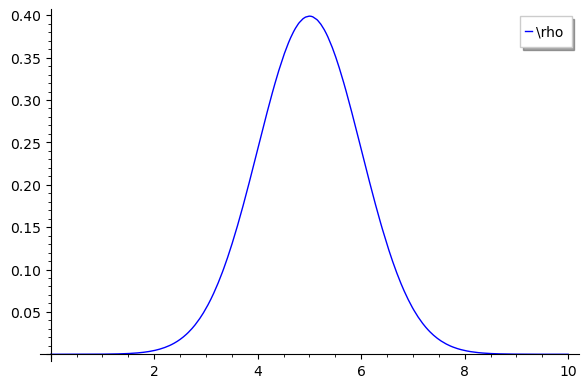

In [25]:
P = plot(eq0.rhs()(l=1/2, a=5), (0,10), legend_label=LatexExpr(r'\rho'))
P 